In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [71]:
df=pd.read_csv('car_price.csv')
df

,Unnamed: 0,car_name,car_prices_in_rupee,kms_driven,fuel_type,transmission,ownership,manufacture,engine,Seats
0,0,Jeep Compass 2.0 Longitude Option BSIV,10.03 Lakh,"86,226 kms",Diesel,Manual,1st Owner,2017.0,1956 cc,5 Seats
1,1,Renault Duster RXZ Turbo CVT,12.83 Lakh,"13,248 kms",Petrol,Automatic,1st Owner,2021.0,1330 cc,5 Seats
2,2,Toyota Camry 2.5 G,16.40 Lakh,"60,343 kms",Petrol,Automatic,1st Owner,2016.0,2494 cc,5 Seats
3,3,Honda Jazz VX CVT,7.77 Lakh,"26,696 kms",Petrol,Automatic,1st Owner,2018.0,1199 cc,5 Seats
4,4,Volkswagen Polo 1.2 MPI Highline,5.15 Lakh,"69,414 kms",Petrol,Manual,1st Owner,2016.0,1199 cc,5 Seats
...,...,...,...,...,...,...,...,...,...,...
5507,5507,BMW X1 sDrive 20d xLine,28.90 Lakh,"45,000 kms",Diesel,Automatic,1st Owner,2018.0,2995 cc,7 Seats
5508,5508,BMW M Series M4 Coupe,64.90 Lakh,"29,000 kms",Petrol,Automatic,2nd Owner,2015.0,1968 cc,5 Seats
5509,5509,Jaguar XF 2.2 Litre Luxury,13.75 Lakh,"90,000 kms",Diesel,Automatic,2nd Owner,2013.0,2755 cc,5 Seats
5510,5510,BMW 7 Series 730Ld,29.90 Lakh,"79,000 kms",Diesel,Automatic,3rd Owner,2015.0,2967 cc,6 Seats


In [72]:
df.shape

(5512, 10)

In [73]:
df = df.drop("Unnamed: 0", axis=1)
df.head()

,car_name,car_prices_in_rupee,kms_driven,fuel_type,transmission,ownership,manufacture,engine,Seats
0,Jeep Compass 2.0 Longitude Option BSIV,10.03 Lakh,"86,226 kms",Diesel,Manual,1st Owner,2017.0,1956 cc,5 Seats
1,Renault Duster RXZ Turbo CVT,12.83 Lakh,"13,248 kms",Petrol,Automatic,1st Owner,2021.0,1330 cc,5 Seats
2,Toyota Camry 2.5 G,16.40 Lakh,"60,343 kms",Petrol,Automatic,1st Owner,2016.0,2494 cc,5 Seats
3,Honda Jazz VX CVT,7.77 Lakh,"26,696 kms",Petrol,Automatic,1st Owner,2018.0,1199 cc,5 Seats
4,Volkswagen Polo 1.2 MPI Highline,5.15 Lakh,"69,414 kms",Petrol,Manual,1st Owner,2016.0,1199 cc,5 Seats


In [74]:
df=df.drop_duplicates()

In [75]:
df.isna().sum()

car_name                2
car_prices_in_rupee     8
kms_driven             18
fuel_type              11
transmission           12
ownership              11
manufacture            15
engine                 13
Seats                  10
dtype: int64

In [76]:
df = df.dropna(subset=["car_name","car_prices_in_rupee"])

In [77]:
df["fuel_type"] = df["fuel_type"].fillna (df["fuel_type"].mode()[0]) df["transmission"] = df["transmission].fillna(df["transmission"], mode()[0]) df["ownership"]=df["ownership"].fillna(df["ownership"], mode()[0]) df["manufacture"] = df["manufacture"].fillna (df["manufacture"],mode()[0]) df["seats"]=df["seats"].fillha (df["seats"],mode()[0])

SyntaxError: unterminated string literal (detected at line 1) (852729476.py, line 1)

In [78]:
df["fuel_type"] = df["fuel_type"].fillna(df["fuel_type"].mode()[0])
df["transmission"] = df["transmission"].fillna(df["transmission"].mode()[0]) 
df["ownership"] = df["ownership"].fillna(df["ownership"].mode()[0])
df["manufacture"] = df["manufacture"].fillna(df["manufacture"].mode()[0])
df["Seats"] = df["Seats"].fillna(df["Seats"].mode()[0])                        

In [79]:
df.isna().sum()

car_name                0
car_prices_in_rupee     0
kms_driven             18
fuel_type               0
transmission            0
ownership               0
manufacture             0
engine                 13
Seats                   0
dtype: int64

In [80]:
def extract_car_brand(car_name):
    car_brand = car_name.split()[0]
    return car_brand

df["car_name"] = df["car_name"].apply(extract_car_brand)
df.head()

,car_name,car_prices_in_rupee,kms_driven,fuel_type,transmission,ownership,manufacture,engine,Seats
0,Jeep,10.03 Lakh,"86,226 kms",Diesel,Manual,1st Owner,2017.0,1956 cc,5 Seats
1,Renault,12.83 Lakh,"13,248 kms",Petrol,Automatic,1st Owner,2021.0,1330 cc,5 Seats
2,Toyota,16.40 Lakh,"60,343 kms",Petrol,Automatic,1st Owner,2016.0,2494 cc,5 Seats
3,Honda,7.77 Lakh,"26,696 kms",Petrol,Automatic,1st Owner,2018.0,1199 cc,5 Seats
4,Volkswagen,5.15 Lakh,"69,414 kms",Petrol,Manual,1st Owner,2016.0,1199 cc,5 Seats


In [81]:
df["car_name"].value_counts()

Maruti           1369
Hyundai          1004
Honda             490
Mahindra          309
Mercedes-Benz     276
Tata              267
Toyota            263
Ford              168
Renault           167
BMW               166
Audi              163
Volkswagen        159
Skoda             113
Chevrolet          82
Nissan             63
MG                 61
Kia                61
Jeep               48
Land               47
Volvo              30
Jaguar             29
Datsun             24
Fiat               17
Mini               13
Porsche            10
Lexus              10
Mitsubishi          8
Maserati            4
Isuzu               4
Force               1
Premier             1
Bentley             1
Name: car_name, dtype: int64

In [82]:
def extract_price(car_price):
    car_price_elements = car_price.split()
    if car_price_elements[-1] == "Lakh":
        return float(car_price_elements[0]) * 100000 # 1,00,000
    elif car_price_elements[-1] == "Crore":
        return float(car_price_elements[0]) * 10000000 # 1,00,00,000
    else:
        return float(car_price_elements[0].replace(",", "")) # 69,420 -> 69420.00

df["car_prices_in_rupee"] = df["car_prices_in_rupee"].apply(extract_price)
df.head()

,car_name,car_prices_in_rupee,kms_driven,fuel_type,transmission,ownership,manufacture,engine,Seats
0,Jeep,1003000.0,"86,226 kms",Diesel,Manual,1st Owner,2017.0,1956 cc,5 Seats
1,Renault,1283000.0,"13,248 kms",Petrol,Automatic,1st Owner,2021.0,1330 cc,5 Seats
2,Toyota,1640000.0,"60,343 kms",Petrol,Automatic,1st Owner,2016.0,2494 cc,5 Seats
3,Honda,777000.0,"26,696 kms",Petrol,Automatic,1st Owner,2018.0,1199 cc,5 Seats
4,Volkswagen,515000.0,"69,414 kms",Petrol,Manual,1st Owner,2016.0,1199 cc,5 Seats


In [83]:
def convert_km_to_numbers(kms):
    kms_in_numbers = int(kms.split()[0].replace(",", ""))
    return kms_in_numbers

df["kms_driven"] = df["kms_driven"].apply(lambda i: np.nan if pd.isna(i) else convert_km_to_numbers(i))
df["kms_driven"].fillna(df["kms_driven"].mean())
df.head()

,car_name,car_prices_in_rupee,kms_driven,fuel_type,transmission,ownership,manufacture,engine,Seats
0,Jeep,1003000.0,86226.0,Diesel,Manual,1st Owner,2017.0,1956 cc,5 Seats
1,Renault,1283000.0,13248.0,Petrol,Automatic,1st Owner,2021.0,1330 cc,5 Seats
2,Toyota,1640000.0,60343.0,Petrol,Automatic,1st Owner,2016.0,2494 cc,5 Seats
3,Honda,777000.0,26696.0,Petrol,Automatic,1st Owner,2018.0,1199 cc,5 Seats
4,Volkswagen,515000.0,69414.0,Petrol,Manual,1st Owner,2016.0,1199 cc,5 Seats


In [84]:
df["fuel_type"].value_counts()

Petrol      2935
Diesel      2371
Cng           80
Lpg           28
Electric      14
Name: fuel_type, dtype: int64

In [85]:
col_OHE = pd.get_dummies(df["fuel_type"])
col_OHE.pop(col_OHE.columns[-1])
df = pd.concat([df, col_OHE], axis=1)
df = df.drop("fuel_type", axis=1)
df.head()

,car_name,car_prices_in_rupee,kms_driven,transmission,ownership,manufacture,engine,Seats,Cng,Diesel,Electric,Lpg
0,Jeep,1003000.0,86226.0,Manual,1st Owner,2017.0,1956 cc,5 Seats,0,1,0,0
1,Renault,1283000.0,13248.0,Automatic,1st Owner,2021.0,1330 cc,5 Seats,0,0,0,0
2,Toyota,1640000.0,60343.0,Automatic,1st Owner,2016.0,2494 cc,5 Seats,0,0,0,0
3,Honda,777000.0,26696.0,Automatic,1st Owner,2018.0,1199 cc,5 Seats,0,0,0,0
4,Volkswagen,515000.0,69414.0,Manual,1st Owner,2016.0,1199 cc,5 Seats,0,0,0,0


In [86]:
df["transmission"].value_counts()

Manual       3916
Automatic    1512
Name: transmission, dtype: int64

In [87]:
df["transmission"] = df["transmission"].astype("category").cat.codes
df["transmission"] = df["transmission"].apply(lambda x: 1 if x == 0 else 0)
df.head()

,car_name,car_prices_in_rupee,kms_driven,transmission,ownership,manufacture,engine,Seats,Cng,Diesel,Electric,Lpg
0,Jeep,1003000.0,86226.0,0,1st Owner,2017.0,1956 cc,5 Seats,0,1,0,0
1,Renault,1283000.0,13248.0,1,1st Owner,2021.0,1330 cc,5 Seats,0,0,0,0
2,Toyota,1640000.0,60343.0,1,1st Owner,2016.0,2494 cc,5 Seats,0,0,0,0
3,Honda,777000.0,26696.0,1,1st Owner,2018.0,1199 cc,5 Seats,0,0,0,0
4,Volkswagen,515000.0,69414.0,0,1st Owner,2016.0,1199 cc,5 Seats,0,0,0,0


In [88]:
df["ownership"].value_counts()

1st Owner    3672
2nd Owner    1294
3rd Owner     357
4th Owner      84
5th Owner      12
0th Owner       6
9th Owner       1
7th Owner       1
5st Owner       1
Name: ownership, dtype: int64

In [89]:
def get_ownership(ownership):
    ownership_in_int = int(ownership.split()[0][0])
    return ownership_in_int

df["ownership"] = df["ownership"].apply(get_ownership)
df.head()

,car_name,car_prices_in_rupee,kms_driven,transmission,ownership,manufacture,engine,Seats,Cng,Diesel,Electric,Lpg
0,Jeep,1003000.0,86226.0,0,1,2017.0,1956 cc,5 Seats,0,1,0,0
1,Renault,1283000.0,13248.0,1,1,2021.0,1330 cc,5 Seats,0,0,0,0
2,Toyota,1640000.0,60343.0,1,1,2016.0,2494 cc,5 Seats,0,0,0,0
3,Honda,777000.0,26696.0,1,1,2018.0,1199 cc,5 Seats,0,0,0,0
4,Volkswagen,515000.0,69414.0,0,1,2016.0,1199 cc,5 Seats,0,0,0,0


In [90]:
df["manufacture"].value_counts()

2017.0    615
2015.0    519
2018.0    512
2019.0    483
2016.0    457
2014.0    455
2013.0    367
2020.0    342
2021.0    334
2012.0    298
2011.0    259
2010.0    217
2022.0    141
2009.0    132
2008.0    113
2007.0     60
2006.0     42
2005.0     28
2004.0     16
2002.0     13
2003.0      8
2000.0      4
1998.0      2
2001.0      2
1809.0      1
1995.0      1
2023.0      1
1921.0      1
2027.0      1
2109.0      1
2030.0      1
2025.0      1
1999.0      1
Name: manufacture, dtype: int64

In [91]:
def get_age(year):
    age = 2023 - year
    return age

df["manufacture"] = df["manufacture"].apply(get_age)
df.head()

,car_name,car_prices_in_rupee,kms_driven,transmission,ownership,manufacture,engine,Seats,Cng,Diesel,Electric,Lpg
0,Jeep,1003000.0,86226.0,0,1,6.0,1956 cc,5 Seats,0,1,0,0
1,Renault,1283000.0,13248.0,1,1,2.0,1330 cc,5 Seats,0,0,0,0
2,Toyota,1640000.0,60343.0,1,1,7.0,2494 cc,5 Seats,0,0,0,0
3,Honda,777000.0,26696.0,1,1,5.0,1199 cc,5 Seats,0,0,0,0
4,Volkswagen,515000.0,69414.0,0,1,7.0,1199 cc,5 Seats,0,0,0,0


In [92]:
def get_cc(cc):
    cc_in_int = int(cc.split()[0])
    return cc_in_int

df["engine"] = df["engine"].apply(lambda i: np.nan if pd.isna(i) else get_cc(i))
df["engine"].fillna(df["engine"].mean())
df.head()

,car_name,car_prices_in_rupee,kms_driven,transmission,ownership,manufacture,engine,Seats,Cng,Diesel,Electric,Lpg
0,Jeep,1003000.0,86226.0,0,1,6.0,1956.0,5 Seats,0,1,0,0
1,Renault,1283000.0,13248.0,1,1,2.0,1330.0,5 Seats,0,0,0,0
2,Toyota,1640000.0,60343.0,1,1,7.0,2494.0,5 Seats,0,0,0,0
3,Honda,777000.0,26696.0,1,1,5.0,1199.0,5 Seats,0,0,0,0
4,Volkswagen,515000.0,69414.0,0,1,7.0,1199.0,5 Seats,0,0,0,0


In [93]:
def get_seat(seat):
    seat_in_int = int(seat.split()[0])
    return seat_in_int

df["Seats"] = df["Seats"].apply(get_seat)
df.head()

,car_name,car_prices_in_rupee,kms_driven,transmission,ownership,manufacture,engine,Seats,Cng,Diesel,Electric,Lpg
0,Jeep,1003000.0,86226.0,0,1,6.0,1956.0,5,0,1,0,0
1,Renault,1283000.0,13248.0,1,1,2.0,1330.0,5,0,0,0,0
2,Toyota,1640000.0,60343.0,1,1,7.0,2494.0,5,0,0,0,0
3,Honda,777000.0,26696.0,1,1,5.0,1199.0,5,0,0,0,0
4,Volkswagen,515000.0,69414.0,0,1,7.0,1199.0,5,0,0,0,0


In [94]:
car_name_OHE = pd.get_dummies(df["car_name"])
car_name_OHE = car_name_OHE.drop(car_name_OHE.columns[-1], axis=1)
df = pd.concat([car_name_OHE, df], axis=1)
df = df.drop("car_name", axis=1)
df.head()

,Audi,BMW,Bentley,Chevrolet,Datsun,Fiat,Force,Ford,Honda,Hyundai,...,kms_driven,transmission,ownership,manufacture,engine,Seats,Cng,Diesel,Electric,Lpg
0,0,0,0,0,0,0,0,0,0,0,...,86226.0,0,1,6.0,1956.0,5,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,13248.0,1,1,2.0,1330.0,5,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,60343.0,1,1,7.0,2494.0,5,0,0,0,0
3,0,0,0,0,0,0,0,0,1,0,...,26696.0,1,1,5.0,1199.0,5,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,69414.0,0,1,7.0,1199.0,5,0,0,0,0


In [95]:
df.columns

Index(['Audi', 'BMW', 'Bentley', 'Chevrolet', 'Datsun', 'Fiat', 'Force',
       'Ford', 'Honda', 'Hyundai', 'Isuzu', 'Jaguar', 'Jeep', 'Kia', 'Land',
       'Lexus', 'MG', 'Mahindra', 'Maruti', 'Maserati', 'Mercedes-Benz',
       'Mini', 'Mitsubishi', 'Nissan', 'Porsche', 'Premier', 'Renault',
       'Skoda', 'Tata', 'Toyota', 'Volkswagen', 'car_prices_in_rupee',
       'kms_driven', 'transmission', 'ownership', 'manufacture', 'engine',
       'Seats', 'Cng', 'Diesel', 'Electric', 'Lpg'],
      dtype='object')

In [96]:
df.describe()

,Audi,BMW,Bentley,Chevrolet,Datsun,Fiat,Force,Ford,Honda,Hyundai,...,kms_driven,transmission,ownership,manufacture,engine,Seats,Cng,Diesel,Electric,Lpg
count,5428.000000,5428.000000,5428.000000,5428.000000,5428.000000,5428.000000,5428.000000,5428.000000,5428.000000,5428.000000,...,5.410000e+03,5428.000000,5428.000000,5428.000000,5415.000000,5428.000000,5428.000000,5428.000000,5428.000000,5428.000000
mean,0.030029,0.030582,0.000184,0.015107,0.004422,0.003132,0.000184,0.030951,0.090273,0.184967,...,6.357537e+04,0.278556,1.427413,7.600037,1536.522438,5.254053,0.014738,0.436809,0.002579,0.005158
std,0.170684,0.172199,0.013573,0.121989,0.066353,0.055881,0.013573,0.173200,0.286598,0.388306,...,4.440288e+04,0.448330,0.718340,5.165845,604.438603,0.734606,0.120515,0.496037,0.050725,0.071643
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.500000e+02,0.000000,0.000000,-86.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,3.323200e+04,0.000000,1.000000,5.000000,1197.000000,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,5.939600e+04,0.000000,1.000000,7.000000,1396.000000,5.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,8.450325e+04,1.000000,2.000000,10.000000,1950.000000,5.000000,0.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.120000e+06,1.000000,9.000000,214.000000,10997.000000,15.000000,1.000000,1.000000,1.000000,1.000000


In [97]:
df.isna().sum()

Audi                    0
BMW                     0
Bentley                 0
Chevrolet               0
Datsun                  0
Fiat                    0
Force                   0
Ford                    0
Honda                   0
Hyundai                 0
Isuzu                   0
Jaguar                  0
Jeep                    0
Kia                     0
Land                    0
Lexus                   0
MG                      0
Mahindra                0
Maruti                  0
Maserati                0
Mercedes-Benz           0
Mini                    0
Mitsubishi              0
Nissan                  0
Porsche                 0
Premier                 0
Renault                 0
Skoda                   0
Tata                    0
Toyota                  0
Volkswagen              0
car_prices_in_rupee     0
kms_driven             18
transmission            0
ownership               0
manufacture             0
engine                 13
Seats                   0
Cng         

In [98]:
df["kms_driven"] = df["kms_driven"].fillna(value=df["kms_driven"].mean())
df["engine"] = df["engine"].fillna(value=df["engine"].mean())

In [99]:
df.shape

(5428, 42)

In [100]:
df.isna().sum()

Audi                   0
BMW                    0
Bentley                0
Chevrolet              0
Datsun                 0
Fiat                   0
Force                  0
Ford                   0
Honda                  0
Hyundai                0
Isuzu                  0
Jaguar                 0
Jeep                   0
Kia                    0
Land                   0
Lexus                  0
MG                     0
Mahindra               0
Maruti                 0
Maserati               0
Mercedes-Benz          0
Mini                   0
Mitsubishi             0
Nissan                 0
Porsche                0
Premier                0
Renault                0
Skoda                  0
Tata                   0
Toyota                 0
Volkswagen             0
car_prices_in_rupee    0
kms_driven             0
transmission           0
ownership              0
manufacture            0
engine                 0
Seats                  0
Cng                    0
Diesel                 0


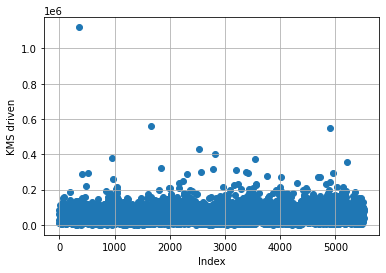

In [101]:
plt.scatter(df.index, df["kms_driven"])
plt.grid()
plt.xlabel("Index")
plt.ylabel("KMS driven")
plt.show()

In [102]:
# df["kms_driven"].plot(kind="hist")

In [103]:
df = df[df["kms_driven"] < 400000]

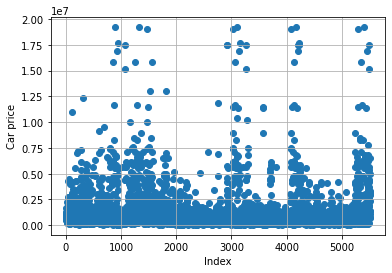

In [104]:
plt.scatter(df.index, df["car_prices_in_rupee"])
plt.grid()
plt.xlabel("Index")
plt.ylabel("Car price")
plt.show()

In [105]:
# df["car_prices_in_rupee"].plot(kind="hist")


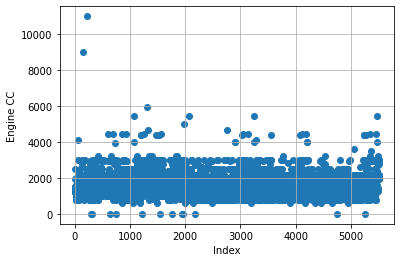

In [106]:
plt.scatter(df.index, df["engine"])
plt.grid()
plt.xlabel("Index")
plt.ylabel("Engine CC")
plt.show()

In [107]:
# df["engine"].plot(kind="hist")

In [108]:
df = df[(df["engine"] >= 624) & (df["engine"] <= 6000)]

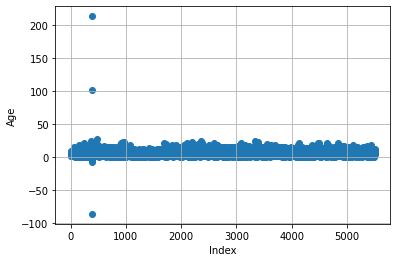

In [109]:
plt.scatter(df.index, df["manufacture"])
plt.grid()
plt.xlabel("Index")
plt.ylabel("Age")
plt.show()

In [110]:
# df["manufacture"].plot(kind="hist")
